# 1. Load runtime table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

index_info_df = pd.read_csv('cases/full/index-info.tsv', sep='\t')
index_info_df.loc[index_info_df['Name'] == '0810PADBR-1', 'Organism'] = 'Campylobacter jejuni'
index_info_df.loc[index_info_df['Name'] == '1405WAEXK-1', 'Organism'] = 'Escherichia coli'
index_info_df.loc[index_info_df['Name'] == '1408MLGX6-3WGS', 'Organism'] = 'Listeria monocytogenes'
index_info_df.loc[index_info_df['Name'] == '1203NYJAP-1 - Tuna Scrape Outbreak', 'Organism'] = 'Salmonella enterica'

execution_order = ['Campylobacter jejuni', 'Escherichia coli',
                  'Listeria monocytogenes', 'Salmonella enterica']

# Calculated from an empty index "gdi init" and
# "gdi db size --unit B"
empty_index_size_bytes = 208896

for idx, organism in enumerate(execution_order):
    for iteration in [1, 2, 3]:
        index_size_iteration_value = index_info_df.loc[(index_info_df['Organism'] == organism) & \
                  (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
        if idx == 0:
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - 208896
        else:
            organism_prev = execution_order[idx - 1]
            index_size_iteration_value_prev = index_info_df.loc[(index_info_df['Organism'] == organism_prev) & \
                      (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - index_size_iteration_value_prev
index_info_df

,Name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),Analysis memory (max/process),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism)
0,0810PADBR-1,1,22,45117,1102,32,1634890,969.08,3.163837e+10,3.428127e+09,...,1.235374e+10,7.402291e+08,46665728.0,105.17,5.443912e+08,275349504.0,1127.16,3.163837e+10,Campylobacter jejuni,46456832.0
1,1405WAEXK-1,1,9,45117,1102,32,5412686,735.64,9.107980e+09,1.683624e+09,...,9.673462e+09,3.800670e+09,134737920.0,96.33,8.176353e+08,459063296.0,1048.20,9.673462e+09,Escherichia coli,88072192.0
2,1408MLGX6-3WGS,1,31,45117,1102,32,2939733,743.46,2.859383e+10,1.928933e+09,...,1.680535e+10,9.866117e+08,174526464.0,126.51,9.937183e+08,660197376.0,986.54,2.859383e+10,Listeria monocytogenes,39788544.0
3,1203NYJAP-1 - Tuna Scrape Outbreak,1,23,45117,1102,32,4808805,542.71,2.064738e+10,1.370657e+09,...,4.627037e+10,3.002397e+09,252043264.0,122.26,1.333158e+09,869711872.0,959.50,4.627037e+10,Salmonella enterica,77516800.0
4,0810PADBR-1,2,22,45117,1102,32,1634890,918.73,3.078411e+10,3.428184e+09,...,1.377599e+10,7.449108e+08,46403584.0,106.84,5.440922e+08,275890176.0,1076.93,3.078411e+10,Campylobacter jejuni,46194688.0
5,1405WAEXK-1,2,9,45117,1102,32,5412686,718.66,8.670171e+09,1.683505e+09,...,8.914026e+09,3.803709e+09,134504448.0,116.89,8.169308e+08,459284480.0,1048.27,8.914026e+09,Escherichia coli,88100864.0
6,1408MLGX6-3WGS,2,31,45117,1102,32,2939733,749.41,2.807024e+10,1.928933e+09,...,1.680661e+10,1.037353e+09,173465600.0,125.41,9.928786e+08,660254720.0,993.54,2.807024e+10,Listeria monocytogenes,38961152.0
7,1203NYJAP-1 - Tuna Scrape Outbreak,2,23,45117,1102,32,4808805,562.04,1.919409e+10,1.370464e+09,...,3.771182e+10,2.726552e+09,249270272.0,129.44,1.334055e+09,869912576.0,988.33,3.771182e+10,Salmonella enterica,75804672.0
8,0810PADBR-1,3,22,45117,1102,32,1634890,919.80,3.076841e+10,3.428151e+09,...,1.507837e+10,7.402127e+08,46637056.0,80.24,5.438095e+08,275492864.0,1055.04,3.076841e+10,Campylobacter jejuni,46428160.0
9,1405WAEXK-1,3,9,45117,1102,32,5412686,731.42,8.699195e+09,1.683472e+09,...,9.736053e+09,3.804434e+09,134230016.0,111.76,8.185774e+08,459481088.0,1054.83,9.736053e+09,Escherichia coli,87592960.0


In [2]:
index_info_df.set_index(['Organism', 'Iteration'])[['Index size', 'Index size (organism)']]

,,Index size,Index size (organism)
Organism,Iteration,,
Campylobacter jejuni,1,46665728.0,46456832.0
Escherichia coli,1,134737920.0,88072192.0
Listeria monocytogenes,1,174526464.0,39788544.0
Salmonella enterica,1,252043264.0,77516800.0
Campylobacter jejuni,2,46403584.0,46194688.0
Escherichia coli,2,134504448.0,88100864.0
Listeria monocytogenes,2,173465600.0,38961152.0
Salmonella enterica,2,249270272.0,75804672.0
Campylobacter jejuni,3,46637056.0,46428160.0


# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [3]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']
stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [4]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Name'] = df['Name'] + "\n(" + df['Organism'] + ', ' + df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_runtime_df

,Name,Organism,Number samples,Reference length,Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp)
0,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,969.08,16.151333,0.269189,44.049091,1.634890
1,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,735.64,12.260667,0.204344,81.737778,5.412686
2,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,743.46,12.391000,0.206517,23.982581,2.939733
3,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,542.71,9.045167,0.150753,23.596087,4.808805
4,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,918.73,15.312167,0.255203,41.760455,1.634890
5,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,718.66,11.977667,0.199628,79.851111,5.412686
6,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,749.41,12.490167,0.208169,24.174516,2.939733
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,562.04,9.367333,0.156122,24.436522,4.808805
8,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,919.80,15.330000,0.255500,41.809091,1.634890
9,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,731.42,12.190333,0.203172,81.268889,5.412686


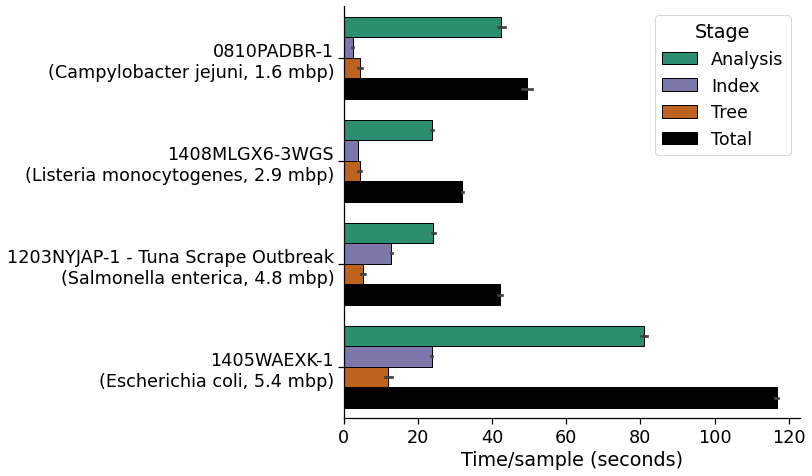

In [5]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Name').agg('first').sort_values('Reference length').index.tolist()
    
    g = sns.catplot(y='Name', x='Time/sample (seconds)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_runtime_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-runtime.pdf')

#### 2.1.2.1. Mean/stdevs

In [6]:
index_info_runtime_df[['Name', 'Stage', 'Time/sample (seconds)']]\
 .groupby(['Name', 'Stage']).agg(['mean', 'std', 'count'])

Time/sample (seconds)  \
                                                                             mean   
Name                                               Stage                            
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis             42.539545   
                                                   Index                 2.413182   
                                                   Total                49.380758   
                                                   Tree                  4.428030   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis             24.212464   
                                                   Index                12.851304   
                                                   Total                42.244203   
                                                   Tree                  5.180435   
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis             80.952593   
                                                   Index                23.725926   
                                                   Total               116.714815   
                                                   Tree                 12.036296   
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis             23.915591   
                                                   Index                 3.775054   
                                                   Total                31.960753   
                                                   Tree                  4.270108   

                                                                             
                                                                  std count  
Name                                               Stage                     
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis  1.307531     3  
                                                   Index     0.083030     3  
                                                   Total     1.680745     3  
                                                   Tree      0.677220     3  
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis  0.540387     3  
                                                   Index     0.051111     3  
                                                   Total     0.650199     3  
                                                   Tree      0.528146     3  
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis  0.982298     3  
                                                   Index     0.266209     3  
                                                   Total     0.423087     3  
                                                   Tree      1.189041     3  
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis  0.298119     3  
                                                   Index     0.048950     3  
                                                   Total     0.120300     3  
                                                   Tree      0.358769     3

## 2.2. Memory plots

In [7]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
    
    df['Peak Memory/sample (MB)'] = df['Peak Memory (MB)'] / df['Number samples']
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Name'] = df['Name'] + "\n(" + df['Organism'] + ', ' + df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df

index_info_memory_df = melt_memory(index_info_df, id_vars=['Name', 'Organism',
                                                            'Number samples', 'Reference length'])
index_info_memory_df

,Name,Organism,Number samples,Reference length,Stage,Peak Memory (MB),Peak Memory/sample (MB),Reference length (Mbp)
0,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,30172.703125,1371.486506,1.634890
1,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,8686.046875,965.116319,5.412686
2,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,27269.199219,879.651588,2.939733
3,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,19690.878906,856.125170,4.808805
4,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,29358.015625,1334.455256,1.634890
5,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,8268.519531,918.724392,5.412686
6,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,26769.871094,863.544229,2.939733
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,18304.906250,795.865489,4.808805
8,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,29343.039062,1333.774503,1.634890
9,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,8296.199219,921.799913,5.412686


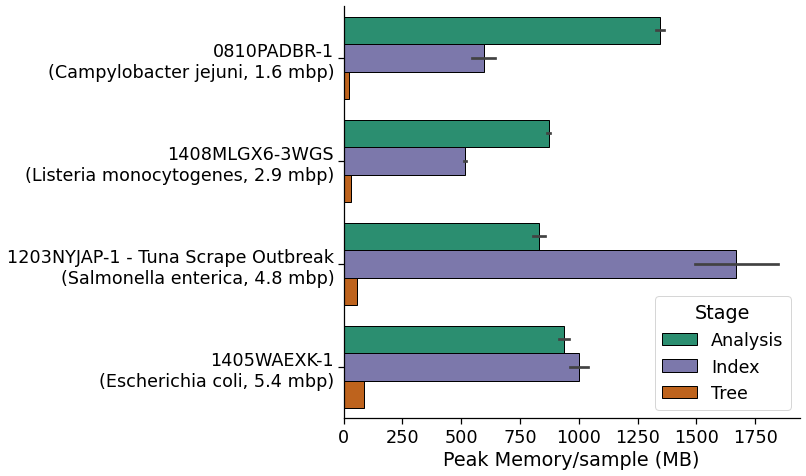

In [8]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_memory_df.groupby('Name').agg('first').sort_values('Reference length').index.tolist()
    
    g = sns.catplot(y='Name', x='Peak Memory/sample (MB)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_memory_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [9]:
index_info_memory_df[['Name', 'Stage', 'Peak Memory/sample (MB)']]\
 .groupby(['Name', 'Stage']).agg(['mean', 'std', 'count'])

Peak Memory/sample (MB)  \
                                                                               mean   
Name                                               Stage                              
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis             1346.572088   
                                                   Index                 595.441110   
                                                   Tree                   23.585997   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis              829.067991   
                                                   Index                1669.863734   
                                                   Tree                   55.315727   
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis              935.213542   
                                                   Index                1000.423466   
                                                   Tree                   86.648148   
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis              872.215684   
                                                   Index                 513.942540   
                                                   Tree                   30.557964   

                                                                               
                                                                    std count  
Name                                               Stage                       
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis   21.579203     3  
                                                   Index      59.073826     3  
                                                   Tree        0.012608     3  
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis   30.596258     3  
                                                   Index     216.141659     3  
                                                   Tree        0.037705     3  
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis   25.942182     3  
                                                   Index      48.489043     3  
                                                   Tree        0.087542     3  
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis    8.124450     3  
                                                   Index       5.319828     3  
                                                   Tree        0.012938     3

## 2.3. Disk usage plots

In [10]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df['Index size'] = df['Index size (organism)']
    
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Disk/sample (MB)'] = df['Disk (MB)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Name'] = df['Name'] + "\n(" + df['Organism'] + ', ' + df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df
index_info_disk_df = melt_disk_usage(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_disk_df

,Name,Organism,Number samples,Reference length,Stage,Disk (MB),Disk/sample (MB),Reference length (Mbp)
0,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,11455.054688,520.684304,1.634890
1,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,6259.445312,695.493924,5.412686
2,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,10314.503906,332.725932,2.939733
3,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,8606.601562,374.200068,4.808805
4,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,11455.046875,520.683949,1.634890
5,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,6259.449219,695.494358,5.412686
6,"1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)",Listeria monocytogenes,31,2939733,Analysis,10314.460938,332.724546,2.939733
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Salmonella enterica,23,4808805,Analysis,8606.613281,374.200577,4.808805
8,"0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)",Campylobacter jejuni,22,1634890,Analysis,11455.042969,520.683771,1.634890
9,"1405WAEXK-1\n(Escherichia coli, 5.4 mbp)",Escherichia coli,9,5412686,Analysis,6259.429688,695.492188,5.412686


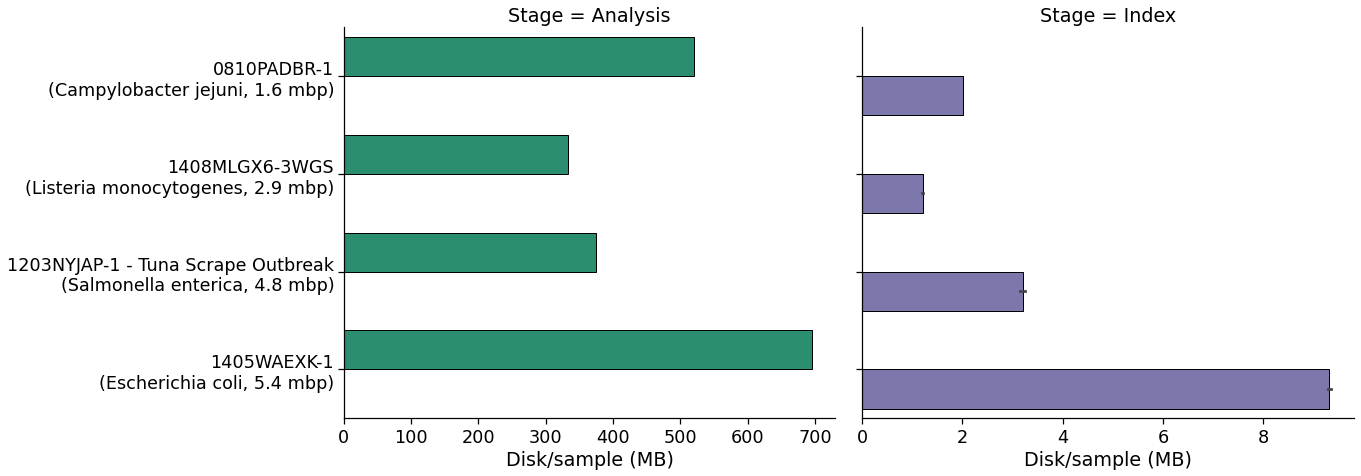

In [11]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_disk_df.groupby('Name').agg('first').sort_values('Reference length').index.tolist()
    
    g = sns.catplot(y='Name', x='Disk/sample (MB)', col="Stage", hue="Stage", ci="sd", kind="bar",
                    data=index_info_disk_df, edgecolor='black',
                    height=7, aspect=1.4, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette,
                    sharex=False)
    g.set(ylabel=None)

    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [12]:
index_info_disk_df[['Name', 'Stage', 'Disk/sample (MB)']]\
 .groupby(['Name', 'Stage']).agg(['mean', 'std', 'count'])

Disk/sample (MB)  \
                                                                        mean   
Name                                               Stage                       
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis       520.684008   
                                                   Index            2.009647   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis       374.199728   
                                                   Index            3.205503   
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis       695.493490   
                                                   Index            9.316551   
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis       332.725134   
                                                   Index            1.212240   

                                                                             
                                                                  std count  
Name                                               Stage                     
0810PADBR-1\n(Campylobacter jejuni, 1.6 mbp)       Analysis  0.000271     3  
                                                   Index     0.006233     3  
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... Analysis  0.001061     3  
                                                   Index     0.058482     3  
1405WAEXK-1\n(Escherichia coli, 5.4 mbp)           Analysis  0.001148     3  
                                                   Index     0.030234     3  
1408MLGX6-3WGS\n(Listeria monocytogenes, 2.9 mbp)  Analysis  0.000717     3  
                                                   Index     0.012827     3